#Bootstrap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
def get_bootstrap_samples(X, y, nr_bootstraps, nr_samples=None):

        nr_samples = X.shape[0]

  bootstrap_samples = []
  for _ in range(nr_bootstraps):
    indices = np.random.choice(X.shape[0], nr_samples, replace=True)

    X_boot = X[indices]
    y_boot = y[indices]
    bootstrap_samples.append((X_boot, y_boot))
  return bootstrap_samples

In [ ]:
data = np.array([
    [1000, 2, 150000],
    [1500, 3, 200000],
    [2000, 3, 250000],
    [2500, 4, 300000],
    [3000, 4, 350000]
])

# Separate the data into x (square feet) and y (prices)
x = data[:, 0:2]
y = data[:, -1]

In [ ]:
get_bootstrap_samples(x, y, 3, nr_samples=None)

[(array([[2500,    4],
         [3000,    4],
         [3000,    4],
         [2000,    3],
         [1500,    3]]),
  array([300000, 350000, 350000, 250000, 200000])),
 (array([[1000,    2],
         [2500,    4],
         [1500,    3],
         [1000,    2],
         [2500,    4]]),
  array([150000, 300000, 200000, 150000, 300000])),
 (array([[2500,    4],
         [1500,    3],
         [3000,    4],
         [3000,    4],
         [1000,    2]]),
  array([300000, 200000, 350000, 350000, 150000]))]

In [ ]:
#classifikacia /Random Forest/

def fit(X, y, nr_estimators):
    X = np.array(X)
    y = np.array(y)
    bootstrap_samples = get_bootstrap_samples(X, y, nr_estimators)

    trees = []
    feature_indices = []
    for i in range(nr_estimators):
      tree = tree_model
      X_boot, y_boot = bootstrap_samples[i]

      idx = np.random.choice(X.shape[1], np.sqrt(X.shape[1]), replace=False)

      tree.feature_indices = idx
      tree.fit(X_boot[:, idx], y_boot)

      trees.append(tree)
      feature_indices.append(idx)
    return trees, feature_indices

def predict(X, trees, feature_indices):
    # this method will predict the labels for a given test dataset
    # get the majority 'vote' for each test instance from the forest
    # Hint: you may want to use 'mode' method from scipy.stats
    # besides the individual trees, you will also need the feature indices
    # it was trained on
    predictions = []

    for i, tree in enumerate(trees):
      idx = feature_indices[i]
      pred = tree.predict(X.iloc[:, idx])
      predictions.append(pred)
    y_preds = np.array(predictions).T
    return stats.mode(y_preds, axis=1)[0]

In [ ]:
#regresia /Random Forest/
def fit(X, y, nr_estimators, model):
    X = np.array(X)
    y = np.array(y)
    bootstrap_samples = get_bootstrap_samples(X, y, nr_estimators)

    trees = []
    feature_indices = []
    for i in range(nr_estimators):
      tree = model
      X_boot, y_boot = bootstrap_samples[i]

      idx = np.random.choice(X.shape[1], int(X.shape[1]**0.5), replace = False)
      # we need to keep the indices of the features used for this tree
      tree.feature_indices = idx
      tree.fit(X_boot[:, idx], y_boot)
      trees.append(tree)
      feature_indices.append(idx)
    return trees, feature_indices


def predict(X, trees, feature_indices, model): #

    predictions = []

    for i, tree in enumerate(trees):
      idx = feature_indices[i]
      pred = tree.predict(X.iloc[:, idx])
      predictions.append(pred)
    y_preds = np.array(predictions).T
    return y_preds


In [ ]:
#կիրառությւն դատայի վրա
import seaborn as sns
diamond_df=sns.load_dataset('diamonds')
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# իրականացնում ենք տեքստային սյունակների կոդավորում
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diamond_df['cut'] = label_encoder.fit_transform(diamond_df['cut'])
diamond_df['color'] = label_encoder.fit_transform(diamond_df['color'])
diamond_df['clarity'] = label_encoder.fit_transform(diamond_df['clarity'])

In [ ]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
y = diamond_df['cut']
X = diamond_df.drop('cut', axis=1)

In [ ]:
# Տրեյնինգ և թեստային տվյալների բաժանում
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
models, feature_indices = fit(X_train, y_train, 10, DecisionTreeClassifier())
y_preds = predict(X_test, models, feature_indices, DecisionTreeClassifier())
y_preds

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

array([[0, 0, 1, ..., 1, 0, 4],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 4],
       ...,
       [0, 0, 1, ..., 1, 0, 4],
       [0, 0, 1, ..., 1, 0, 2],
       [0, 0, 1, ..., 1, 0, 2]])

In [ ]:
from scipy import stats
predictions = stats.mode(y_preds, axis=1)[0]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.03973550858979113
              precision    recall  f1-score   support

           0       0.03      0.99      0.06       483
           1       0.29      0.11      0.16      1472
           2       0.00      0.00      0.00      6465
           3       0.00      0.00      0.00      4137
           4       0.00      0.00      0.00      3625

    accuracy                           0.04     16182
   macro avg       0.06      0.22      0.04     16182
weighted avg       0.03      0.04      0.02     16182

[[ 477    6    0    0    0]
 [1306  166    0    0    0]
 [6374   91    0    0    0]
 [4002  135    0    0    0]
 [3458  167    0    0    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Neural Networks - example

Ունենք ծաղիկների վերաբերյալ ինֆորմացիա /մատրից/՝ x1 – ցողունի երկարություն, x2 – պսակի տրամագիծ, առաջին տողը առաջին ծաղիկի երկարություն և տրամագիծ է, 2-րդ տողը՝ 2-րդ ծաղիկի, ․․․։ Ու ունենք y-ներ /սյուն մատրից/, թե որ ինֆորմացիայի ծաղիկը որ կլասին է պատկանում՝ A, B: Նորմավորում ենք մեր x-երը, y-ն էլ դարձնում ենք 0 կամ 1։

Սա մի ծաղիկի համար ենք անում, մի ծաղիկի մասին ինֆորմացիա ենք տալիս, ու իր համար որոշելու ենք թե ինչ տեսակի ծաղիկ է՝ A թե B: Ինքը ունի 2 հատ ինփութ՝ x1 և x2։ Սա 2 հատ էլ output է ունենալու, կամ y1 է պատասխանը, կամ y2։ output-ները պիտի լինեն 0-ից 1 միջակայքում, քանի որ y-ը կամ 0 է կամ 1 է։ Մեր առաջ խնդիր է դրված, որ ցանծը պիտի ունենա 1 հատ hidden layer 4 հատ նեյրոնով, այսինքն ցանցի կառուցվածքը հետևյալ ձևով է ստացվում՝ 2 input * 4 հատ նեյրոն * 2 output։ Խնդրի պահանջն է, որ ցանցում ոչ գծային գործողությունները սիգմոիդ է։

Դրել ենք w1 և w2 կշիռները՝ առաջին և երկրորդ շերտերի համար:

մեր խնդրում w1-ը, վերոնշյալ գծապատկերի մեջ որ x1 x2-ից գնում է նեյրոն, այդ կշիռներն են, որի մեջ առաջին սյունը x1-ի կշիռներն է, իսկ երկրորդ սյունը՝ x2-ի կշիռներն է։ b1-ը, որ x1 x2-ից գնում է նեյրոն, այդ ֆունկցիայի b-ն է /f(x)-ի b-ն է /։

w2-ը, վերոնշյալ գծապատկերի մեջ որ 𝜎(ℎ(𝑥)-ից գնում է նեյրոն, այդ կշիռներն է, որի մեջ առաջին սյունը առաջին 𝜎(ℎ(𝑥)-ի կշիռներն է, երկրորդ սյունը՝ երկրորդ 𝜎(ℎ(𝑥)-ի կշիռներն է, երրորդ սյունը՝ երրորդ 𝜎(ℎ(𝑥)-ի կշիռներն է, իսկ չորրորդ սյունը՝ չորրորդ 𝜎(ℎ(𝑥)-ի կշիռներն է։ b2-ը, որ (ℎ(𝑥)-ից գնում է նեյրոն, այդ ֆունկցիայի b-ն է /h(x)-ի b-ն է /։  

Ինչպես էինք Gradient Descent-ում  random մի հատ կետ էինք ընտրում, այդ կետից էինք սկսում, նույն ձևով էլ w-ներն ենք random ընտրում, սկզբնական թիվ ենք որոշում․ մեր խնդիրն է գտնել լավագույն w-ներն ու b-ն, որոնց դեպքում ֆունկցիաները լավագույնս կգնահատեն y-ը։ Դրա համար մենք w-ներն ու b-երը անընդհատ փոխում ենք, և տարբեր թվերի դեպքում տարբեր ֆունկցիաներ է ստացվում, պիտի ընտրենք այդ ֆունկցիաներից լավագույնը։

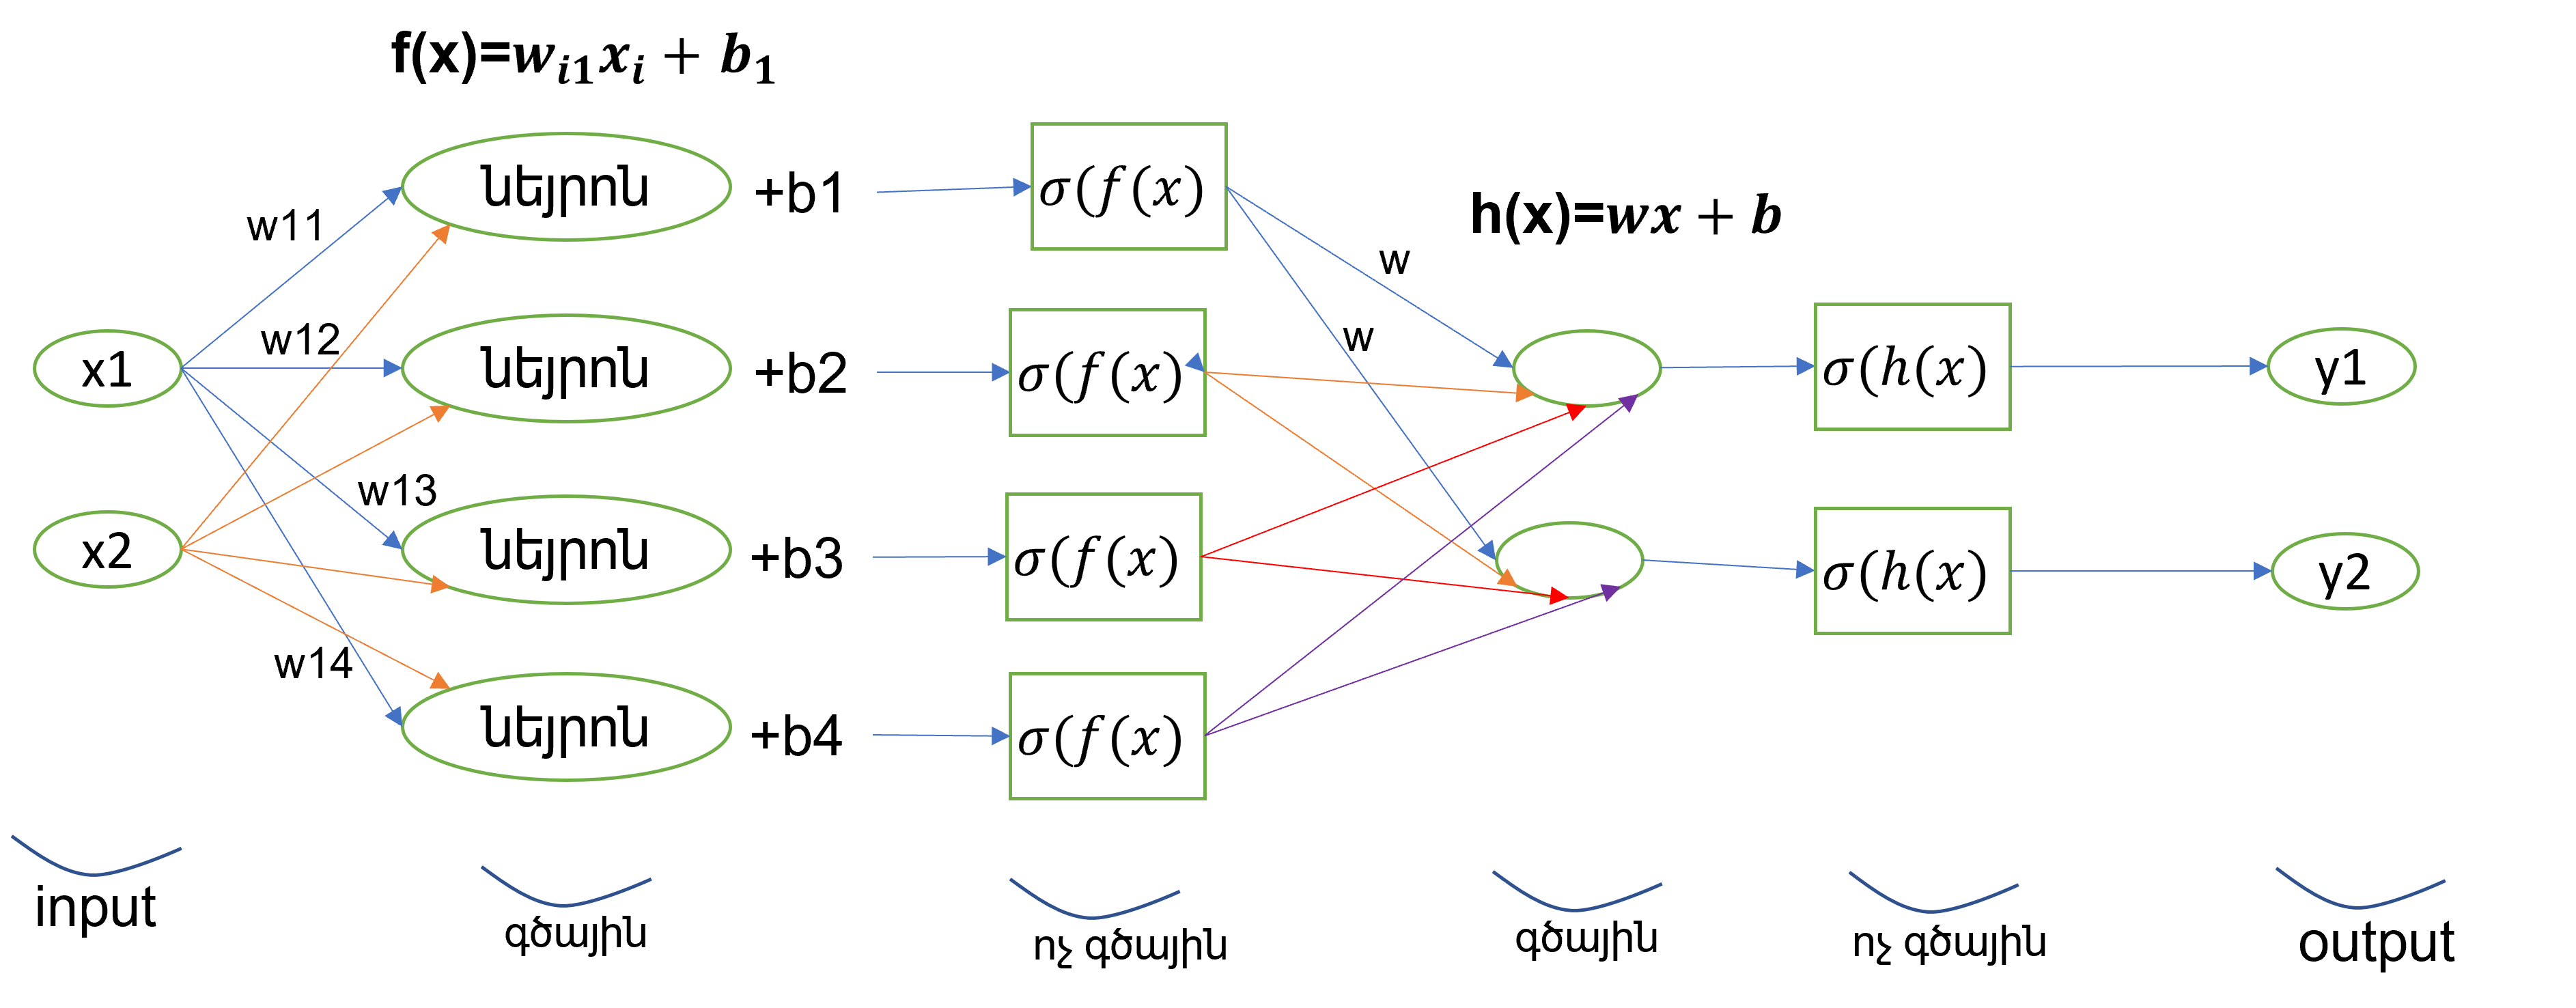

In [ ]:
#mutq(1*2)
#mi caxikov enq ays xndiry lucum
import numpy as np
x=np.array([[0.05280758, 0.03752815]]) #sa matric e` x1 ev x2
x

array([[0.05280758, 0.03752815]])

In [ ]:
# y =Y[0]
y= np.array([[1], [0]]) #sa matric e
y

array([[1],
       [0]])

In [ ]:
#սա առաջին շերտի կշիռներն են
w1 = np.array([
    [0.51, 0.41],
    [0.34, 0.24],
    [0.25, -0.14],
    [-0.62, -0.42],
])
b1 = np.array([-0.65, 0.27, 0.58, 0.16])


In [ ]:
#սա երկրորդ շերտի կշիռներն են
w2 = np.array([
    [-0.41, -0.38, 0.22, 0.1],
    [-0.16, 0.3, 0.02, 0.03]
])
b2 = np.array([0.49, 0.41])

In [ ]:
print(w1.shape)
print(x.shape)
print(b1.shape)

(4, 2)
(1, 2)
(4,)


Անցնենք խնդրի լուծմանը։ Գծայինները նշանակենք Z-ով, իսկ ոչ գծայինները՝ A-ով։
Ունենք x, w1, w2, b1, b2, y
* Z1 = w1x + b1
* A1 = 𝜎(Z1)
* Z2=w2A1+b2
* A2 = 𝜎(Z2) – սա մեր պատասխանն է, մեր կանխատեսումն է

Այս դեպքում A2-ը պիտի համեմատենք y-ի հետ, դա անում ենք loss function-ով


In [ ]:
#hidden shert
#qani vor gorc unenq matricneri het, matricnery bazmapatkum enq @-ov kam .dot-ov
Z1 = x @ w1.T + b1
#w1-y transponacnum enq - x-i shape-y (1, 2) e, qani vor 1 tox e, isk w-n (4, 2) e,  hima w1-in transponacnum enq, vor darna (2, 4), vor karoxananq irar het transponacnel
Z1

array([[-0.60768159,  0.29696133,  0.58794795,  0.11149748]])

In [ ]:
#gcayin sherty unecanq, hima sigmoidi funkcia enq grum
def sigmoid(x):
  return 1 / (1+np.exp(-x))


In [ ]:
#qcum enq Z1-y sigmoid funkciayi mej
A1 = sigmoid(Z1)
A1

array([[0.35258824, 0.57369952, 0.64289417, 0.52784553]])

In [ ]:
#output shert
#hima noric voch gcayin mas e harkavor
Z2 = A1 @ w2.T + b2
Z2

array([[0.32165427, 0.55438899]])

In [ ]:
#qcum enq Z2-y sigmoid funkciayi mej
A2 = sigmoid(Z2)
A2

array([[0.57972736, 0.63515327]])

A2 գրեցինք, հիմա հաջորդ քայլը կլինի այն, որ A2-ը համեմատենք y-ի հետ /իրական արժեքի հետ/, ու պիտի հասկանանք՝ մեր սխալը ինչքան է, մեր մոդելը ինչքանով է սխալվում։ Հիմա պիտի loss-ի գաղափարը ներմուծենք, որ իրան ցանկացած տվյալ տանք, այդ տվյալի ․․․՞- ը կարողանանք կանխատեսել։
Այստեղ օգտագործելու ենք Mean squared error loss-ը, որը հաշվարկվում է հետևյալ բանաձևով՝

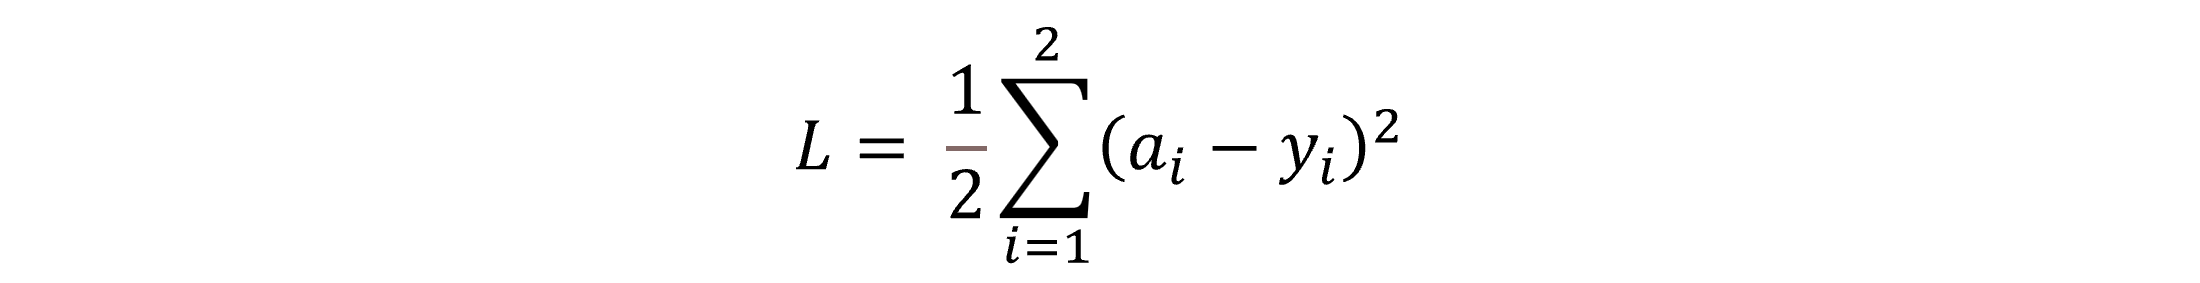

որտեղ a_i-ն output layer-ի i-րդ նեյրոնի ակտիվացիայի արժեքն է, իսկ y_i-ն իրական y-ի i-րդ արժեքը։ Երկու output համար կլինի հետևյալ բանաձևը, քանի որ y-ը կամ 0 է կամ 1 output-ը /կլասիֆիկացիայի խնդիր է այս դեպքում/
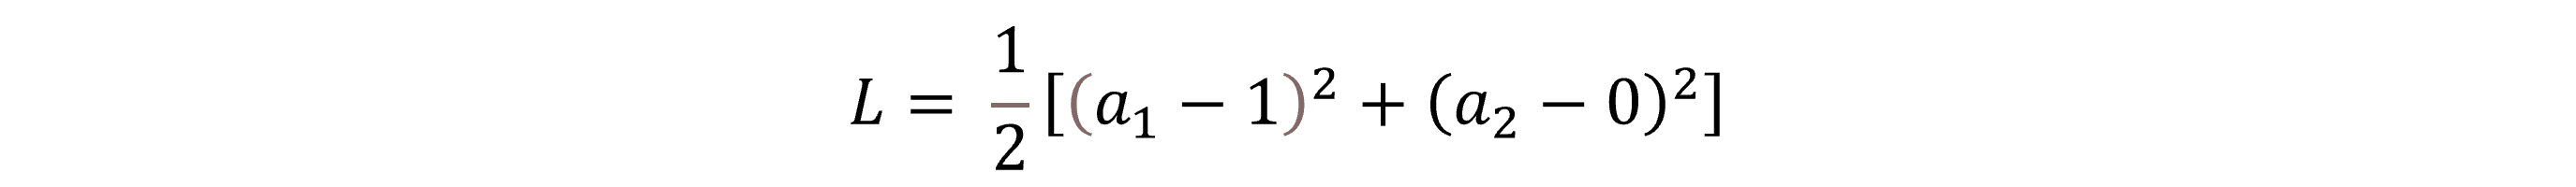

a_i-ն ցանցի տված 	output-ն է, մեր պարագայում դա կլինի A2-ի արժեքը՝ array([[0.57972736, 0.63515327]]), y_i-ն էլ իրական արժեքն է։ Այստեղ բանաձևում կանխատեսված արժեքի ու իրական արժեքի տարբերությունն է։ A2-ը երկու հատ թիվ է, դրա համար L=  1/2[(a_1-1)^2+〖(a_2-0)〗^2] բանաձևում երկու գումարելի ենք ստանում։ y-ը 1 և 0 է, դրա համար բանաձևում գրված է y-ի առաջին արժեքը 1, y-ի երկրորդ արժեքը 0։


In [ ]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = np.sum((y_true - y_pred)**2) / n #mijin qarakusayin shexumn e, piti bajanenq n-i vra
    return mse

In [ ]:
y_true = np.array([1, 0])
y_pred = A2[0] #sa A2 listi 0 indexn e

In [ ]:
y_true

array([1, 0])

In [ ]:
y_pred

array([0.57972736, 0.63515327])

In [ ]:
mse = mean_squared_error(y_true, y_pred) #mse inchqan poqr, aydqan lav, aydqan sxaly qich
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2900243841066863


In [ ]:
#Forward Pass
Z1 = x @ w1.T + b1
A1 = sigmoid(Z1)
Z2 = x @ w2.T + b2
A2 = sigmoid(Z2)

In [ ]:
#loss hashvark
loss = 0.5 * np.mean((A2-Y)**2)

print("Outputs:\n", A2)
print("Loss =", loss)

In [ ]:
# 1. Sigmoid anktivacman funkcia
def sigmoid(x):
  return 1 / (1+np.exp(-x))


# 2. Linear shert (gcayin poxakerpum)
def linear(input_data, w, b):
  return np.dot(input_data, w.T) + b

# 3. MSE Loss Criterion
def mse_loss(output, target):
  return 0.5**np.mean((output - target)**2)

In [ ]:
# 4. Forward pass funkcia
def forward_pass(input_data):
  Z1 = linear(input_data, w1, b1) #1-in gcayin shert
  A1 = sigmoid(Z1)                #1-in sigmoid aktivacwum
  Z2 = linear(A1, w2, b2)         #2-rd gcayin shert
  A2 = sigmoid(Z2)                #2-rd sigmoid aktivacwum
  return A2  #canci verjnakan output
# 5. Loss hashvark
def loss_by_classes(input_data, target):
  output = forward_pass(input_data)
  loss = mse_loss(output, target)
  return loss


# 6. Hashvarkum enq loss-y
loss_per_class = loss_by_classes(x, Y)
print("Loss per class:", loss_per_class)

### **Խնդիր.**

Մեզ տրված են երկու տեսակ ծաղիկների (A և B) վերաբերյալ տվյալներ (ցողունի բարձրություն ( 𝑥1 ) և պսակի տրամագիծ( 𝑥2 )): Քանի որ խնդիրը supervised learning-ի է, հետևաբար նաև ունենք ծաղիկների label-ները՝ Y:
Մեր խնդիրն է ունենալ այնպիսի մոդել, որին ինչ-որ ծաղիկի X-երը տանք, այն մեզ ասի, թե ծաղիկը A տեսակի է, թե B (կամ, որ նույնն է, մեզ ասի ծաղիկը A տեսակի է, թե ոչ):

In [ ]:
import numpy as np

In [ ]:
# մեր տվյալներն են, ունենք 7 ծաղիկ` 4-ը A, 3-ը B

X = np.array([[26.86,  6.86],
               [29.48,  8.57],
               [29.63,  8.01],
               [33.74,  7.  ],
               [18.54,  6.97],
               [15.98,  5.69],
               [19.01,  4.5 ]])


Y = np.array([["A"],
              ["A"],
              ["A"],
              ["A"],
              ["B"],
              ["B"],
              ["B"],])

In [ ]:
#Նորմավորենք X-երը
X[:,0] -= np.mean(X[:,0])
X[:,1] -= np.mean(X[:,1])

X[:,0] /= np.var(X[:,0])
X[:,1] /= np.var(X[:,1])

Y-ները կարող ենք կոդավորել 1-երով ու 0-ներով (one-hot encoding), այսինքն՝ դարձնենք 7x2-չափանի մատրից: Յուրաքանչյուր տողում մեկ հատ 1, մեկ հատ 0: Եթե առաջին սյունում 1 է, ապա ծաղիկը A է և ընդհակառակը:

In [ ]:
Y = np.array ([[1,0] if i[0]=="A" else [0,1] for i in Y])

###**Առաջադրանք N1**

Կառուցել մեր խնդրին համապատասխան նեյրոնային ցանցը:

* Ակնհայտ է, որ այն պետք է ունենա 2 հատ input (𝑥1 և 𝑥2-ին համապատասխան) և երկու հատ output (𝑦1 և 𝑦2), որոնցից առաջինը ցույց է տալու տվյալ ծաղիկի՝ A լինելու հավանականությունը, երկրորդը՝ B լինելու հավանականությունը:

* Output-ները գտնվելու են (0,1) միջակայքում և երկուսի գումարը պարտադիր չէ, որ լինի 1:

* Ցանցը պետք է ունենա 1 հատ hidden layer 4 նեյրոնով, այսինքն՝ ցանցի կառուցվածքը լինում է 2-4-2:

* Ցանցում բոլոր ոչ գծային գործողությունները սիգմոիդ են:

* Ցանցի առաջին շերտի պարամետրերի մատրիցները (W-երը և b-երը) հետևյալն են՝


In [ ]:
W1 = np.array([[ 0.51,  0.41],
               [ 0.34,  0.24],
               [ 0.25, -0.14],
               [-0.62, -0.42]])

b1 = np.array([-0.65,  0.27,  0.58,  0.16])

**W1**-ի **(i,j)**-րդ տարրը ցույց է տալիս **j**-րդ **input**-ից **hidden layer**-ի **i**-րդ նեյրոն կշիռը:


* Ցանցի երկրորդ շերտի պարամետրերի մատրիցները (W-երը և b-երը) հետևյալն են՝

In [ ]:
W2 = np.array([[-0.41, -0.38,  0.22,  0.1 ],
            [-0.16,  0.3 ,  0.02,  0.03]])

b2 = np.array([0.49, 0.41])

###**Առաջադրանք N2**

Հաշվել առաջին ծաղիկի համար ([ 0.05280758, 0.03752815]) մեր ցանցի output-ները:

Հուշում. hidden layer-ում և output layer-ում երկու մաթեմատիկական ձևափոխություն է տեղի ունենում՝ մեկ գծային և մեկ ոչ գծային: Գծայինի դեպքում արդյունքները սովորաբար նշանակում ենք z-ով, իսկ ոչ գծայինի արդյունքները՝ a-ով (activation):

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# def sigmoid_derivative(x):
#     return x * (1 - x)


In [ ]:
# ⏩ Մուտք (1x2)
x = np.array([[0.05280758, 0.03752815]])
x

array([[0.05280758, 0.03752815]])

In [ ]:
# y = Y[0]
y = np.array([[1],[0]])
y

array([[1],
       [0]])

In [ ]:
print(W1.shape)
print(x.shape)
print(b1.shape)

(4, 2)
(1, 2)
(4,)


In [ ]:
# Hidden շերտ
Z1 = x @ W1.T + b1

In [ ]:
A1 = sigmoid(Z1)

In [ ]:
# Output շերտ
Z2 = A1 @ W2.T + b2
A2 = sigmoid(Z2)

In [ ]:
A2

array([[0.57972736, 0.63515327]])

📌 Արդյունքում

* A2[0, 0] կլինի y1— A ծաղիկ լինելու հավանականություն

* A2[0, 1] կլինի y2— B ծաղիկ լինելու հավանականություն

### **Առաջադրանք N3**

**Հաշվել առաջին ծաղիկի համար մեր ցանցի Loss-ը:**

<font color='Green'>Հուշում.</font> Օգտագործել Mean squared error loss-ը՝ հետևյալ բանաձևով՝

$$ L = \frac{1}{2} \sum_{i=1}^{2} (a_i - y_i)^2$$


որտեղ  ai -ն output layer-ի i-րդ նեյրոնի ակտիվացիայի արժեքն է, իսկ  yi -ն իրական y-ի i-րդ արժեքը:
Քանի որ ունենք երկու output նեյրոն, հետևաբար երկու հատ գումարելի կա գումարում:

$$L = \frac{1}{2} \left[(a_1 - 1)^2 + (a_2 - 0)^2\right]$$


```python
loss = 0.5 * ((a1 - 1)**2 + (a2 - 0)**2)


In [ ]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = np.sum((y_pred - y_true) ** 2) / n
    return mse

In [ ]:
y_true = np.array([1, 0])
y_pred = A2[0]

In [ ]:
y_true

array([1, 0])

In [ ]:
y_pred

array([0.57972736, 0.63515327])

In [ ]:
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2900243841066863


In [ ]:
0.2900243841066863**0.5

0.5385391203122446

### **Առաջադրանք N4**

**Հաշվել բոլոր ծաղիկների համար մեր ցանցի output-ները և ցանցի loss-ը՝ օգտագործելով մատրիցային գործողություններ:**

<font color='Green'>Հուշում.</font> Մատրիցայինի դեպքում մենք ցանցին փոխանցում ենք միանգամից բոլոր ծաղիկների ինֆորմացիան, այսինքն՝ X մատրիցն ամբողջությամբ:

* Այս դեպքում ցանցին փոխանցում ենք 7x2 մատրից, համապատասխանաբար hidden layer-ում մենք ունենում ենք 7x4 նեյրոններ, իսկ output layer-ում 7x2 output նեյրոններ:

* W-ների ու b-երի քանակը նույնն է:
Ցանցի loss-ը լինում է բոլոր 7 ծաղիկների համար հաշվարկված loss-երի միջինը:

In [ ]:
Y_encoded = np.array([[1, 0] if label == "A" else [0, 1] for label in Y.flatten()])

In [ ]:
# Forward Pass
Z1 = X @ W1.T + b1
A1 = sigmoid(Z1)
Z2 = A1 @ W2.T + b2
A2 = sigmoid(Z2)

In [ ]:
# Loss հաշվարկ
loss = 0.5 * np.mean((A2 - Y) ** 2)

print("Outputs:\n", A2)
print("Loss =", loss)

Outputs:
 [[0.57972736 0.63515327]
 [0.55746405 0.63457427]
 [0.56431651 0.63483319]
 [0.57456501 0.63521552]
 [0.58255359 0.63498593]
 [0.59824359 0.63480265]
 [0.60925585 0.63445836]]
Loss = 0.13659214792428334


### **Առաջադրանք N5**

Օգտագործելով ծաղիկների վերաբերյալ տվյալները՝ կլասսներով ստանալ ցանցի output-ը և loss-ը:


Դրա համար անհրաժեշտ է ստեղծել 2 հատ linear, 2 հատ sigmoid ու մեկ հատ MSECriterion շերտ:

In [ ]:
#menq hima yndhanur funkcia enq grum, heto piti iranc kanchenq, mi angam talis enq W1, b1, mi angam` W2, b2
# 1. Linear shert (gcayin poxakerpum)
def linear(input_data, W, b):
  return np.dot(input_data, W.T) + b

In [ ]:
# 2. Sigmoid anktivacman funkcia
def sigmoid(z):
  return 1 / (1+np.exp(-z))

#Z1 = X @ W1.T + b1
#A1 = sigmoid(Z1)
#Z2 = A1 @ W2.T + b2
#A2 = sigmoid(Z2)

In [ ]:
# 3. MSE Loss Criterion
def mse_loss(a, y):
  return 0.5**np.mean((a - y)**2)

In [ ]:
# 4. Forward pass funkcia
def forward_pass(input_data, W1, b1, W2, b2):
  z1 = linear(input_data, W1, b1) #1-in gcayin shert
  a1 = sigmoid(z1)                #1-in sigmoid aktivacum
  z2 = linear(a1, W2, b2)         #2-rd gcayin shert
  a2 = sigmoid(z2)                #2-rd sigmoid aktivacum
  return a1, z1, a2, z2  #canci verjnakan output


In [ ]:

# 5. Loss hashvark
def loss_by_classes(input_data, target, W1, b1, W2, b2):
    a1, z1, a2, z2 = forward_pass(input_data, W1, b1, W2, b2)
    loss = mse_loss(a2, target)
    return loss

# 6. Hashvarkum enq loss-y
Y_encoded = np.array([[1, 0] if label == "A" else [0, 1] for label in Y.flatten()])
loss_per_class = loss_by_classes(x, Y_encoded, W1, b1, W2, b2)
print("Loss per class:", loss_per_class)

Loss per class: 0.8435152546571726






### **Առաջադրանք N6**

1. Backward pass-ի հիմնական քայլեր

* Երկրորդ շերտ (Output layer):

  * Հաշվում ենք loss-ի gradient-ը (դա կլինի output - target):

  * Հաշվում ենք z2-ի  gradient:

  * Հաշվում ենք a2-ի gradient` որպես sigmoid'-ի gradient:

* Առաջին շերտ (Hidden layer):

  * Հաշվում ենք z1-ի gradient:

  * Հաշվում ենք a1-ի gradient` որպես sigmoid'-ի gradient:

2. Backward pass ֆունկցիաների կառուցում

In [ ]:
#talis enq sigmoid funkcian

def sigmoid(x):
  return 1 / (1+np.exp(-x))

#heto sigmoidi acancyaly

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

##talis enq gcayin funkcian
def linear(input_data, w, b):
  return np.dot(input_data, w.T) + b

##heto MSE sxali funkcian
def mse_loss(output, target):
  return 0.5**np.mean((output - target)**2)

#u khashvenq ira acancyaly
def mse_loss_derivative(output, target):
    return output - target

def forward_pass(input_data, W1, b1, W2, b2):
  z1 = linear(input_data, W1, b1) #1-in gcayin shert
  a1 = sigmoid(z1)                #1-in sigmoid aktivacum
  z2 = linear(a1, W2, b2)         #2-rd gcayin shert
  a2 = sigmoid(z2)                #2-rd sigmoid aktivacum (vory mer kanxatesvac y-n e)
  return a1, z1, a2, z2


#hertov iranc acancyalnern enq grum , qani vor het galuc funkcian kacancenq

#khashvenq MSE acancyaly a2-i nkatmamb
def backward_pass(input_data, a1, z1, a2, z2, W1, b1, W2, b2, target, learning_rate=0.01):
    dL_da2 = mse_loss_derivative(a2, target)
 #heto sigmoid acancyaly z2-i nkatmamb
    dL_dz2 = dL_da2 * sigmoid_derivative(z2)


# gradienty hashvum enq yst w2-i: w2-@ transponacnum enq, vor karoxananq matrici bazmapatkumy anenq

    dL_dW2 = np.dot(dL_dz2.T, a1)
    dL_db2 = np.sum(dL_dz2, axis = 0)
#b2-ը շեղում է, որը կիրառվում է ամեն նմուշի համար, այդ պատճառով պետք է գումարել բոլոր նմուշներին

#het enq gnum,yst a1-i enq acancum
    dL_da1 = np.dot(dL_dz2, W2)
    dL_dz1 = dL_da1 * sigmoid_derivative(z1)


#mi hat el het enq gnum yst w1-i enq acancum
    dL_dW1 = np.dot(dL_dz1.T, input_data)
    dL_db1 = np.sum(dL_dz1, axis = 0)

#aystex grum enq gradient discent algoritmy
# gradienty funkciayi achi amenaarag uxxutyunn e,
#minimumi ket gtnelu hamar dimacy minus enq grum
# u nor kety havasar e hin ketic hanac alfa
# angam funkciayi acancyaly hin ketum

    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2.reshape(b2.shape)
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
#veradardznum enq arjeqnery
    return W1, b1, W2, b2, dL_dW1, dL_db1, dL_dW2, dL_db2

#talis enq x ev y arjeqnery
X = np.array([[26.86, 6.86],
              [29.48, 8.57],
              [29.63, 8.01],
              [33.74, 7.0],
              [18.54, 6.97],
              [15.98, 5.69],
              [19.01, 4.5]])

Y = np.array([["A"],
              ["A"],
              ["A"],
              ["A"],
              ["B"],
              ["B"],
              ["B"]])

#iranc normavorum enq
#x-ic - mijin / standart shexman vra
#x-xmin/xmax-xmin
X[:, 0] -= np.mean(X[:, 0])
X[:, 1] -= np.mean(X[:, 1])

X[:, 0] /= np.var(X[:, 0])
X[:, 1] /= np.var(X[:, 1])

Y_encoded = np.array([[1, 0] if label == "A" else [0, 1] for label in Y.flatten()])


#talis enq w ev b arjeqnery
W1 = np.array([[0.51, 0.41],
               [0.34, 0.24],
               [0.25, -0.14],
               [-0.62, -0.42]])
b1 = np.array([-0.65, 0.27, 0.58, 0.16])

W2 = np.array([[0.12, -0.32, 0.25, 0.17],
               [0.45, 0.14, -0.36, -0.21]])
b2 = np.array([0.05, -0.12])

#u gcum enq forward passi mej
a1, z1, a2, z2 = forward_pass(X, W1, b1, W2, b2)

#veradardznum enq nor arjeqnery

W1, b1, W2, b2, dL_dW1, dL_db1, dL_dW2, dL_db2 = backward_pass(
    X, a1, z1, a2, z2, W1, b1, W2, b2, Y_encoded
)

print("Updated W1:\n", W1)
print("Updated b1:\n", b1)
print("Updated W2:\n", W2)
print("Updated b2:\n", b2)


Updated W1:
 [[ 0.5099068   0.40964421]
 [ 0.33985382  0.23942634]
 [ 0.25018257 -0.13928166]
 [-0.61988216 -0.41955208]]
Updated b1:
 [-0.65008304  0.2699672   0.58007442  0.16006825]
Updated W2:
 [[ 0.12079425 -0.31927555  0.25026646  0.16958398]
 [ 0.44927921  0.13940398 -0.36011202 -0.20944554]]
Updated b2:
 [ 0.05055543 -0.12031788]


#CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Prepare the data
print("Step 1: Loading and preparing the MNIST dataset...")
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape for CNN input (add channel dimension)
train_images = train_images.reshape((60000, 28, 28, 1))  #training set-ում 60,000 հատ նկար կա
test_images = test_images.reshape((10000, 28, 28, 1))    #test set-ում 10,000 հատ նկար կա

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Step 1: Loading and preparing the MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)



Step 2: Visualizing a few sample images...


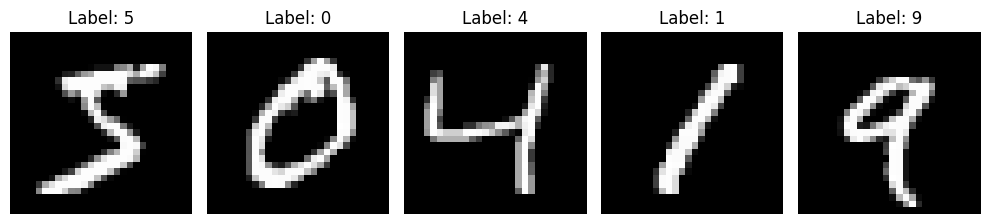

In [ ]:
# Step 2: Visualize a few sample images
print("\nStep 2: Visualizing a few sample images...")
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
# Step 3: Build the CNN model
print("\nStep 3: Building the CNN model...")
def build_model():
    model = models.Sequential()
    # First Convolutional Layer

    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                           input_shape=(28, 28, 1), name='conv_layer1'))

    model.add(layers.MaxPooling2D((2, 2), name='pooling_layer1'))

    # Second Convolutional Layer
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv_layer2'))
    model.add(layers.MaxPooling2D((2, 2), name='pooling_layer2'))

    # Flatten and Dense layers

    model.add(layers.Flatten(name='flatten'))
    model.add(layers.Dense(64, activation='relu', name='dense_layer1'))
    model.add(layers.Dense(32, activation='relu', name='dense_layer2'))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))

    return model

model = build_model()
model.summary()


Step 3: Building the CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_layer1 (Conv2D)            │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer2 (Conv2D)            │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer2 (MaxPooling2D)   │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer1 (Dense)            │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer2 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,690 (483.16 KB)

 Trainable params: 123,690 (483.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Visualize filters and understand model structure
print("\nStep 4: Visualizing model architecture...")
# A function to visualize the convolutional filters after training

def visualize_filters(model, layer_name):
    print(f"Visualizing filters from {layer_name}")
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()

    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    n_filters = filters.shape[3]
    n_cols = min(8, n_filters)
    n_rows = (n_filters + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for i in range(n_filters):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(filters[:, :, 0, i], cmap='viridis')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Step 4: Visualizing model architecture...


Visualizing filters from conv_layer1


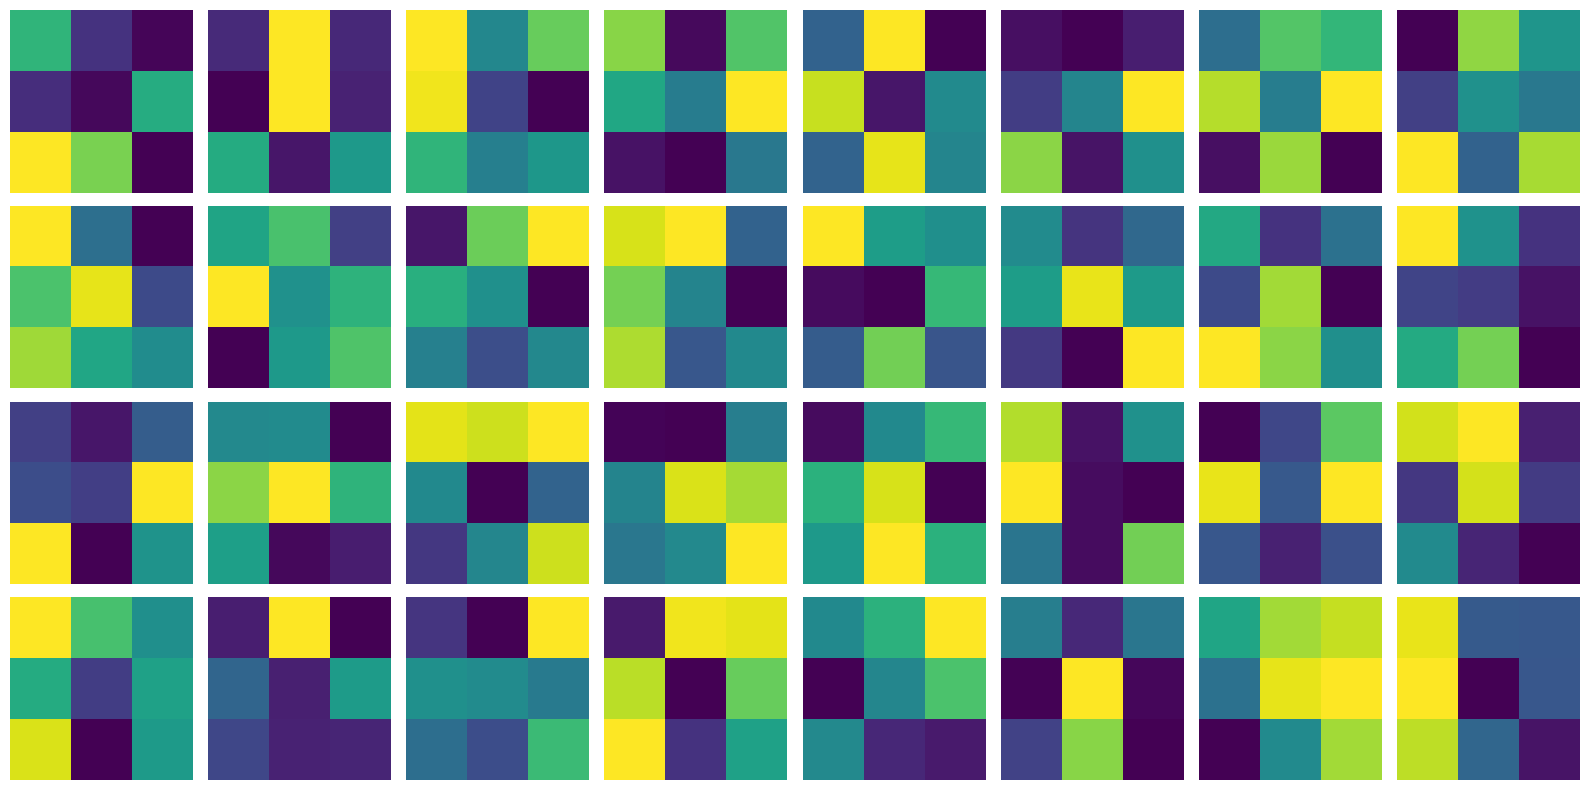

In [ ]:
visualize_filters(model, 'conv_layer1')

Visualizing filters from conv_layer2


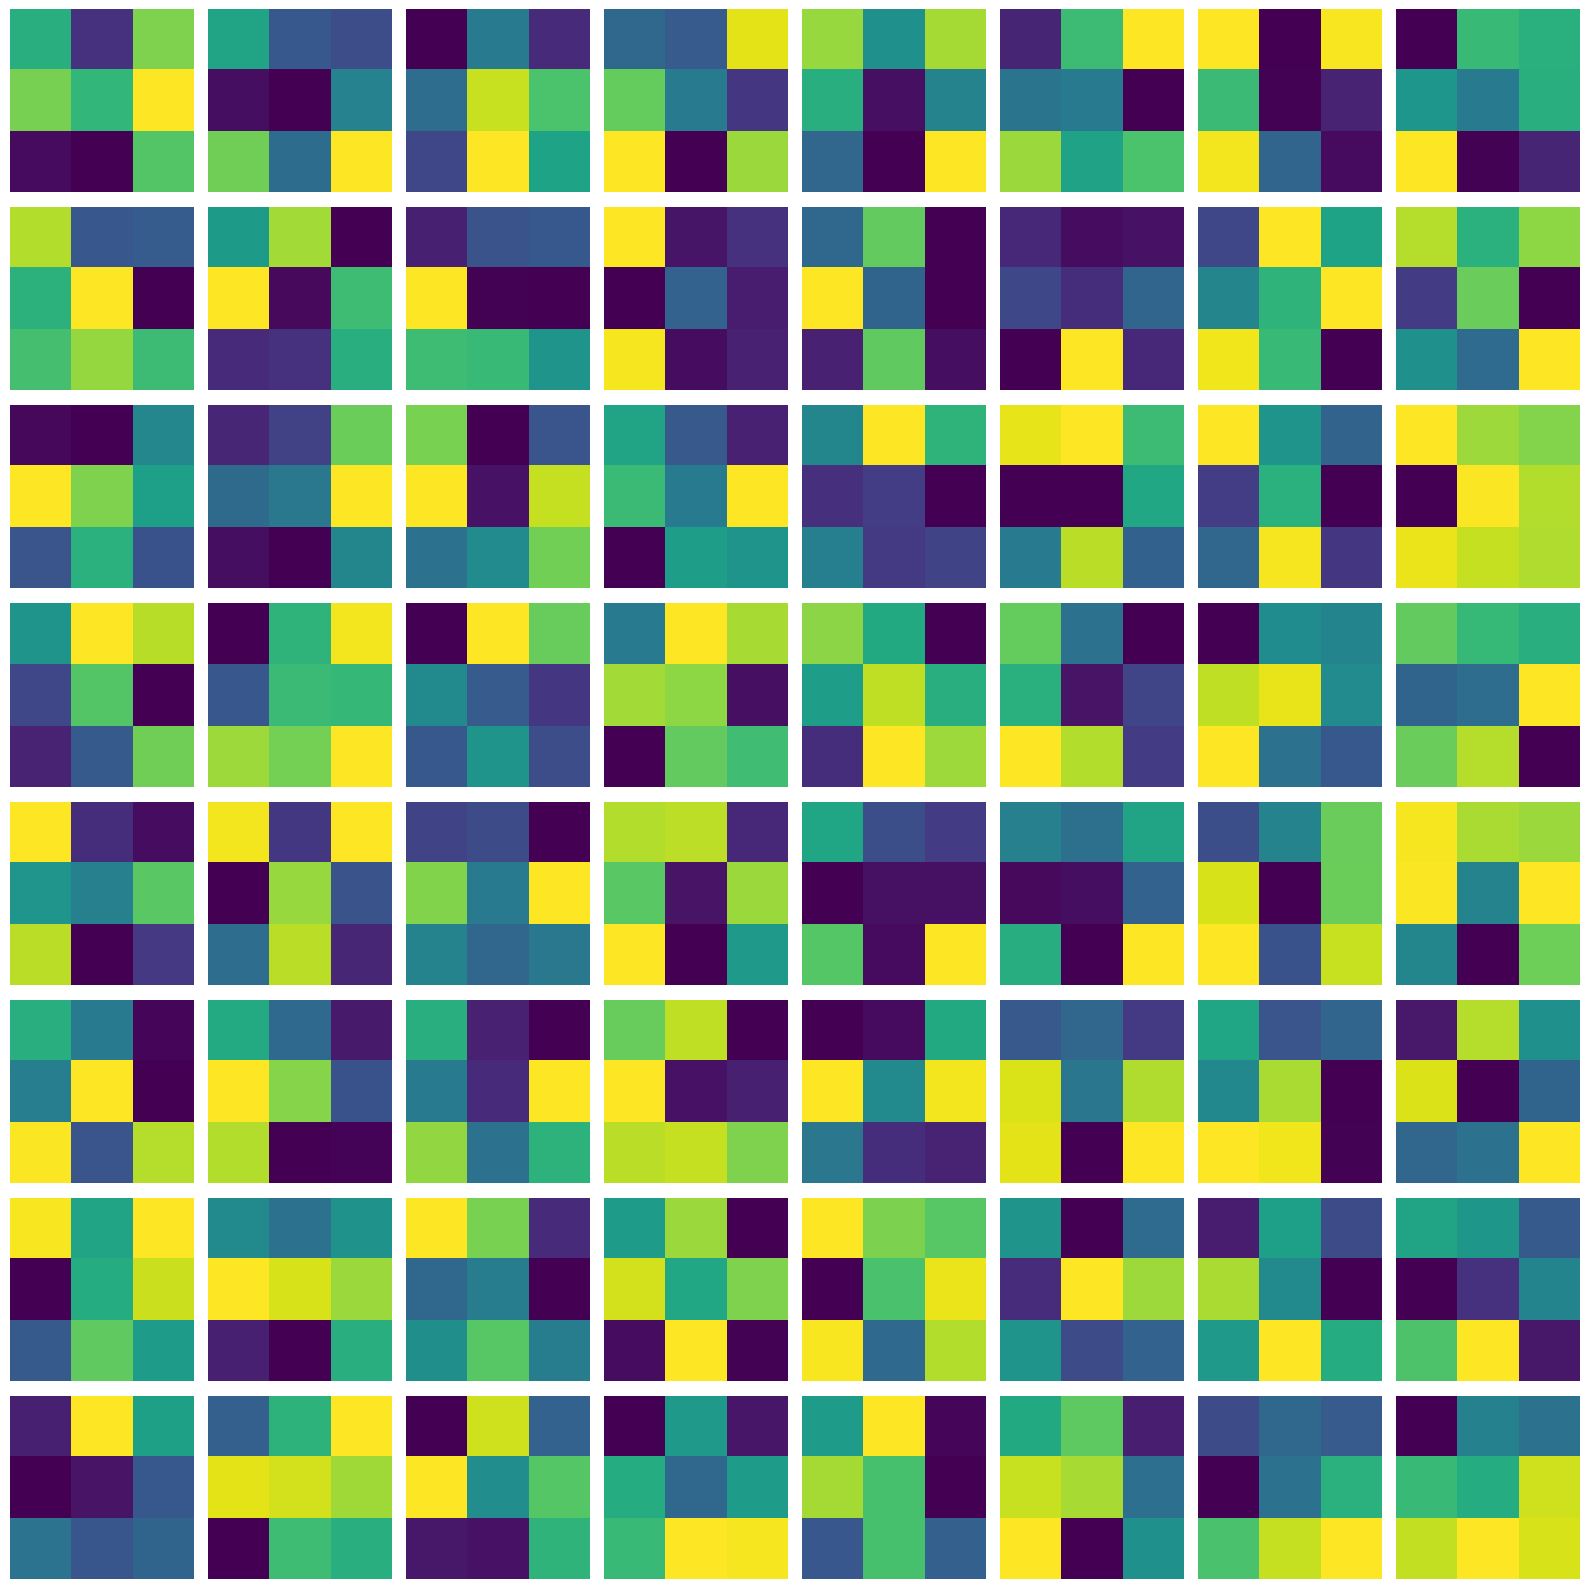

In [ ]:
visualize_filters(model, 'conv_layer2')

In [ ]:
# Step 5: Compile the model
print("\nStep 5: Compiling the model...")
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Step 5: Compiling the model...


This code is compiling a machine learning model, specifically setting up how it will be trained. Here's what each part does:

* **optimizer='adam'** - Sets the optimization algorithm to Adam, which is a popular and efficient gradient descent algorithm that adapts the learning rate during training. It's often a good default choice for deep learning models.
* **loss='categorical_crossentropy'** - Defines the loss function as categorical cross-entropy, which is appropriate for multi-class classification problems where the classes are one-hot encoded (meaning each sample belongs to exactly one class, represented as a vector of 0s with a single 1).

* **metrics=['accuracy']** - Specifies that you want to track accuracy as a performance metric during training, which measures the percentage of correct predictions.

This compilation step prepares your model for training by defining how the model will be updated (optimizer), how it will measure prediction errors (loss function), and what metrics to track to evaluate performance.


In [ ]:
# Step 6: Train the model
print("\nStep 6: Training the model...")
history = model.fit(train_images, train_labels,
                    epochs=5, batch_size=64,
                    validation_data=(test_images, test_labels),
                    verbose=1)



Step 6: Training the model...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.8626 - loss: 0.4504 - val_accuracy: 0.9797 - val_loss: 0.0675
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9808 - loss: 0.0632 - val_accuracy: 0.9866 - val_loss: 0.0393
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9873 - loss: 0.0413 - val_accuracy: 0.9871 - val_loss: 0.0381
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9891 - val_loss: 0.0342
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9923 - val_loss: 0.0267


**epochs** - մեր դատան միշտ էպոխների ենք բաժանում, որ 5 անգամ մինիմումի կետ հաշվի: ամեն էպոխի ընթացքում մեր տված թրեինինգ դատայի նկարները 64 64 (batch_size) տալիս ենք մեր ցանցին։ 5 անգամ դա աշխատում է, այսինքն այստեղ լավագույն արդյունք ստացանք՝ դրանով չի բավարարվում, էլի է աշխատում /մենք ենք ընտրում, թե քանի հատ էպոխ աշխատի/: մեքենայական ուսուցման մեջ իտեռացիաներով էինք դնում, թե քանի իտեռացիա աշխատի decision tree-ն ու մեզ արդյունք տա։ Իսկ այսեղ էպոխ ենք դնում: օրինակ 2-րդ էպոխինը ավելի լավ արդյունք է ստացվում, ինքը գնալով լավացնում է, քանի որ տարբեր ուղղություններով է գրադիենտը գնում

**epochs** - 5 էպոխ ենք վերցրել, մեր դատան 5 մասի է կիսում, ու խառնելով է 5 մասի կիսում, ոչ թե հերթականությամբ, ու ամեն էպոխի մասի վրա է թրեին անում. ու այստեղ դատաների կրկնություններ թույլ չի տալիս, ու ամեն 5 կտորում նոր դատաներ ենք տալիս

**batch_size** - նշանակում է, որ ամեն էպոխում նկարները 64 64 հատով է հերթով նկարները տալիս մեր ցանցին

**validation_data** - տալիս ենք validation դատան, որի վրա որ պիտի ստուգի

**verbose** - ավելացնում ենք, որ տեսնենք բառերով թե ամեն թրեյնինգի կտորը ինչքան է տևել ու ինքան է մնացել

այս օրինակի վրա բարձր accuracy ենք ստանում, քանի որ մաքուր դատա է, պարզ դատա է։ դատայի վրա աշխատելն է իրենից բարդություն ներկայացնում, իսկ ցանցերը գրելը պարզ բան է: հիմնականում մեքենայական ուսուցման մասնագետները CNN-ների հետ են աշխատում, քանի որ ինքը պարզ մոդել է ու պատրաստի շատ ցանցեր կան. իսկ օրինակ ժամանակային շարքերի հետ աշխատելը շատ բարդ է, այստեղ զրոյից ցանց է պետք հավաքել, քանի որ պատրաստի ցանցերը դրա վրա չեն աշխատում: օրինակ տվեցինք 1 տարվա դատան, դրա վրա սովորեց, էն 2-րդ տարվա համար ստացվում է, որ ապագայից դատա ենք տալիս, ու որ արդեն կանխատեսում ենք անում՝ ստացվում է, որ մեր ապագայի դատան է միշտ տեսել, դրա համար է ցանցի արդյունքը այդքան լավը:


այստեղ **fit**-ի հատվածում ամեն անգամ պիտի 1 հատիկ դատա տանք, կամ մի շաբաթվա դատան տանք /բայց մի շաբաթվա դատան էլ պիտի այնպես կազմակերպենք որ օրերով տանք/, դրա համար fit-ը 100 տողանոց կոդ է ստացվում


**Batch և epoch կապը։** օրինակ վերցրել ենք 5 էպող և batch_size-ը տվել ենք 64, սա նշանակում է, որ ընդհանուր դատասեթը բաժանում ենք 5 մասերի, իսկ ամեն մի մասի դատաները՝ նկարները 64 64 ենք տալիս, այսինքն էպոխի ամեն հատված 64 64 մասի ենք բաժանում, ու եթե թիվը 64ի չի բաժանվում՝ վերջում ինչքան որ թիվ մնում է, այդքան հատվածն է վերցնում։ Batch-երը հիմնականում 64, 32 ․․․ այդպես են բաժանում՝ կախված նկարի քանակից։ Էպոխներն էլ կախված են նրանից, թե ինչքան շատ սովորեցնենք, այդքան լավ։ Ու օրինակ եթե գրադիենտն էլ լավ չի աշխատում, accurancy-ն չի բարձրանում, loss-ն էլ չի իջնում, կարող ենք batch_size-ը փոքրացնենք․ քանի որ մենք մեծ չափս ենք տալիս՝ գրադիենտը դժվար է հասնում մինիմումի։

Batch-ը նորմավորելու համար առանձին կոդ ենք գրում, մեր խնդրում նորմավորել պետք չէ, քանի որ դատաները մաքուր են, ու նաև ամենասկզբում մեր դատան նորմավորել ենք՝ /255․0։



* **model.fit()** - This is the method that actually trains the model by fitting it to your data.
* **train_images, train_labels** - These are your training data (input features and corresponding target labels).
* **epochs=5** - This sets the number of complete passes through the entire training dataset to 5. Each epoch means the model sees all training examples once.
* **batch_size=64** - This divides your training data into batches of 64 samples each. The model updates its weights after processing each batch, rather than waiting to see all samples. This improves training efficiency and stability.
* **validation_data=(test_images, test_labels)** - This provides a separate dataset for validation. After each epoch, the model will evaluate its performance on this data to track how well it generalizes to unseen examples.
* **verbose=1** - This controls the amount of information printed during training. With verbose=1, you'll see a progress bar for each epoch showing loss and accuracy metrics.
* **history =** - This captures the training history, which includes metrics like loss and accuracy for each epoch, for both training and validation data. You can use this to plot learning curves later.


Step 7: Visualizing training history...


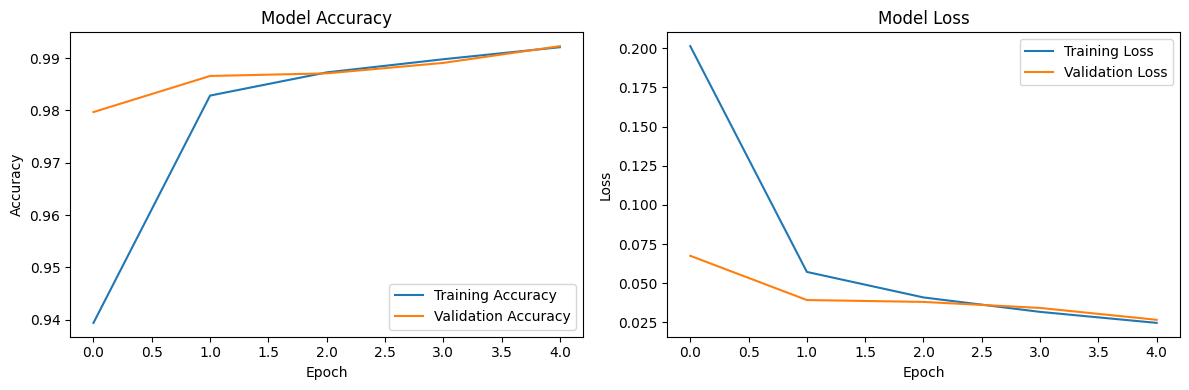

In [ ]:
# Step 7: Visualize the training process
print("\nStep 7: Visualizing training history...")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Step 8: Evaluate the model
print("\nStep 8: Evaluating the model...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
# այստեղ test_images ու test_labels է տալիս, ու գնահատում է մոդելը, ու վերջնականում ստանում ենք 0,9923 ճշգրտություն


Step 8: Evaluating the model...
313/313 - 2s - 8ms/step - accuracy: 0.9923 - loss: 0.0267
Test accuracy: 0.9923



Step 9: Visualizing learned filters...
Visualizing filters from conv_layer1


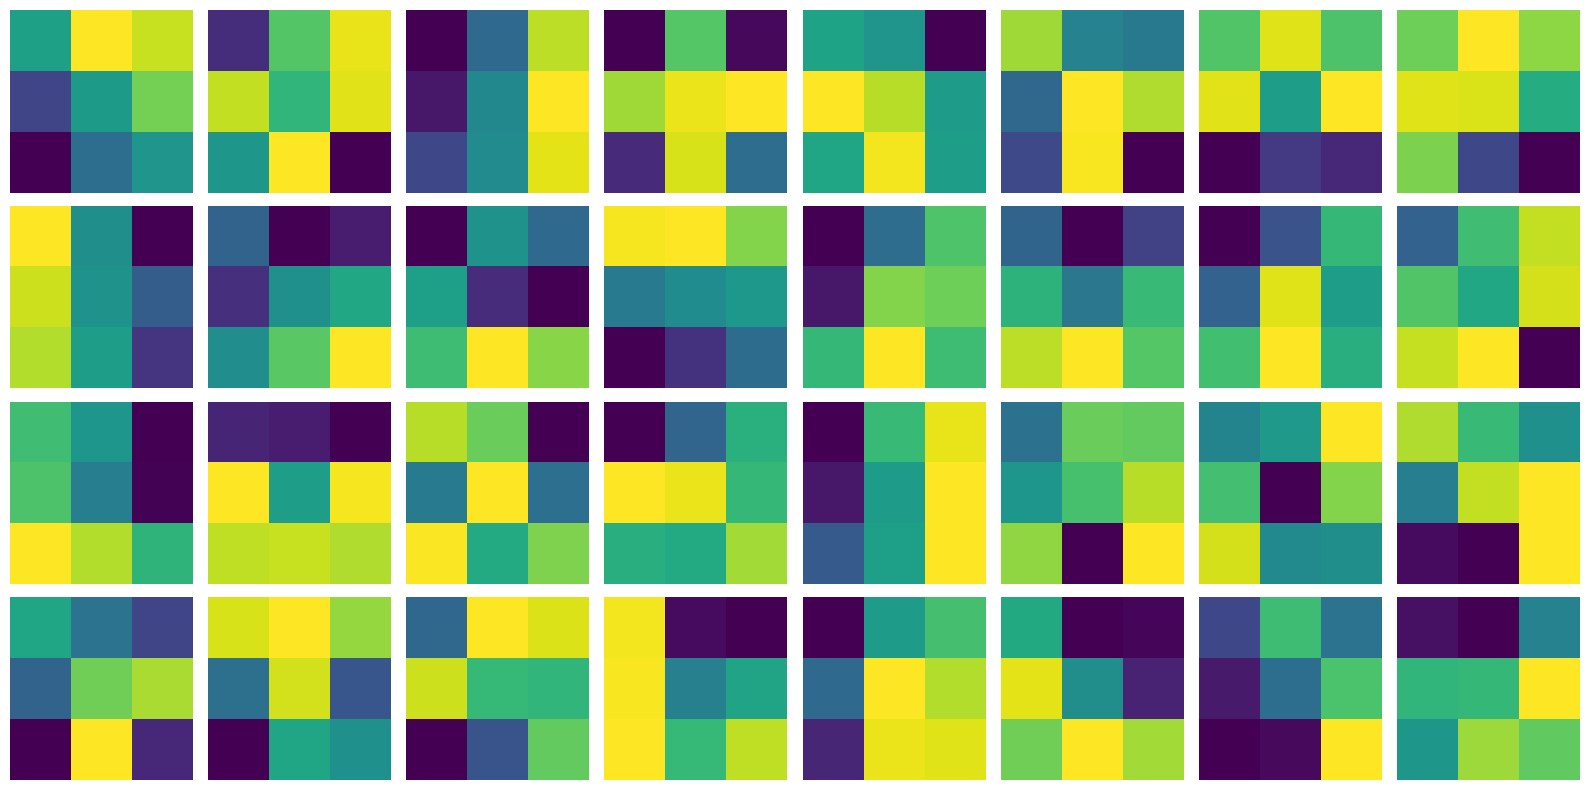

In [ ]:
# Step 9: Visualize the learned filters
print("\nStep 9: Visualizing learned filters...")
try:
    visualize_filters(model, 'conv_layer1')
except Exception as e:
    print(f"Could not visualize filters: {e}")


Step 10: Making predictions on test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


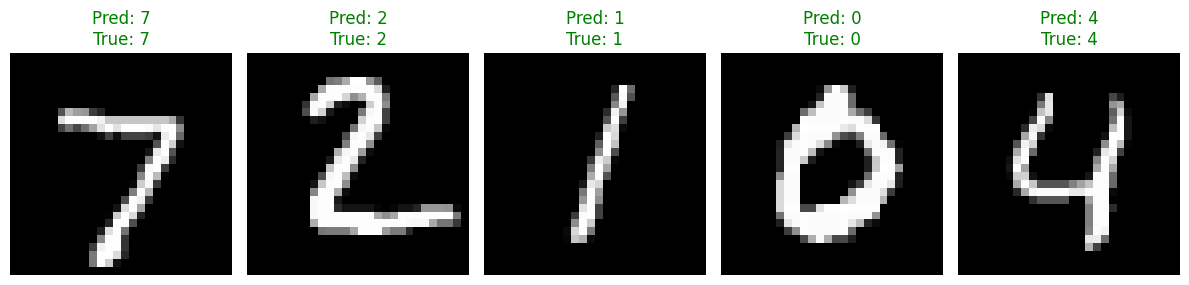

In [ ]:
# Step 10: Make predictions
print("\nStep 10: Making predictions on test images...")
predictions = model.predict(test_images[:5])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(test_labels[:5], axis=1)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_classes[i] == actual_classes[i] else 'red'
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {actual_classes[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


Քայլ 11: Հատկանիշների քարտեզների վիզուալիզացիա...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Վիզուալիզացնում ենք conv_layer1 շերտի հատկանիշների քարտեզները
Հատկանիշների քարտեզի ձևը: (1, 26, 26, 32)


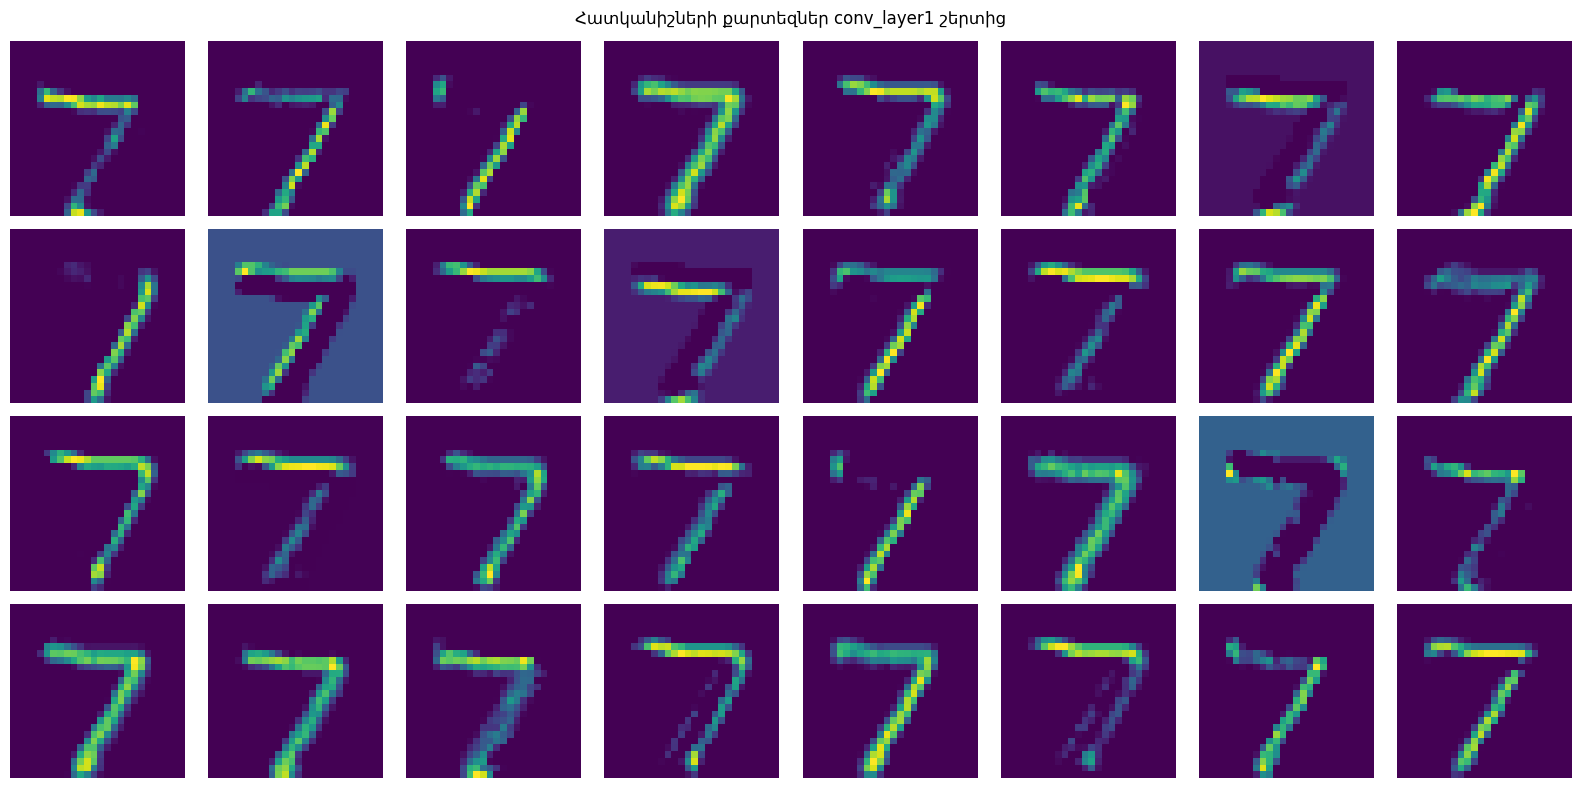

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Վիզուալիզացնում ենք conv_layer2 շերտի հատկանիշների քարտեզները
Հատկանիշների քարտեզի ձևը: (1, 11, 11, 64)


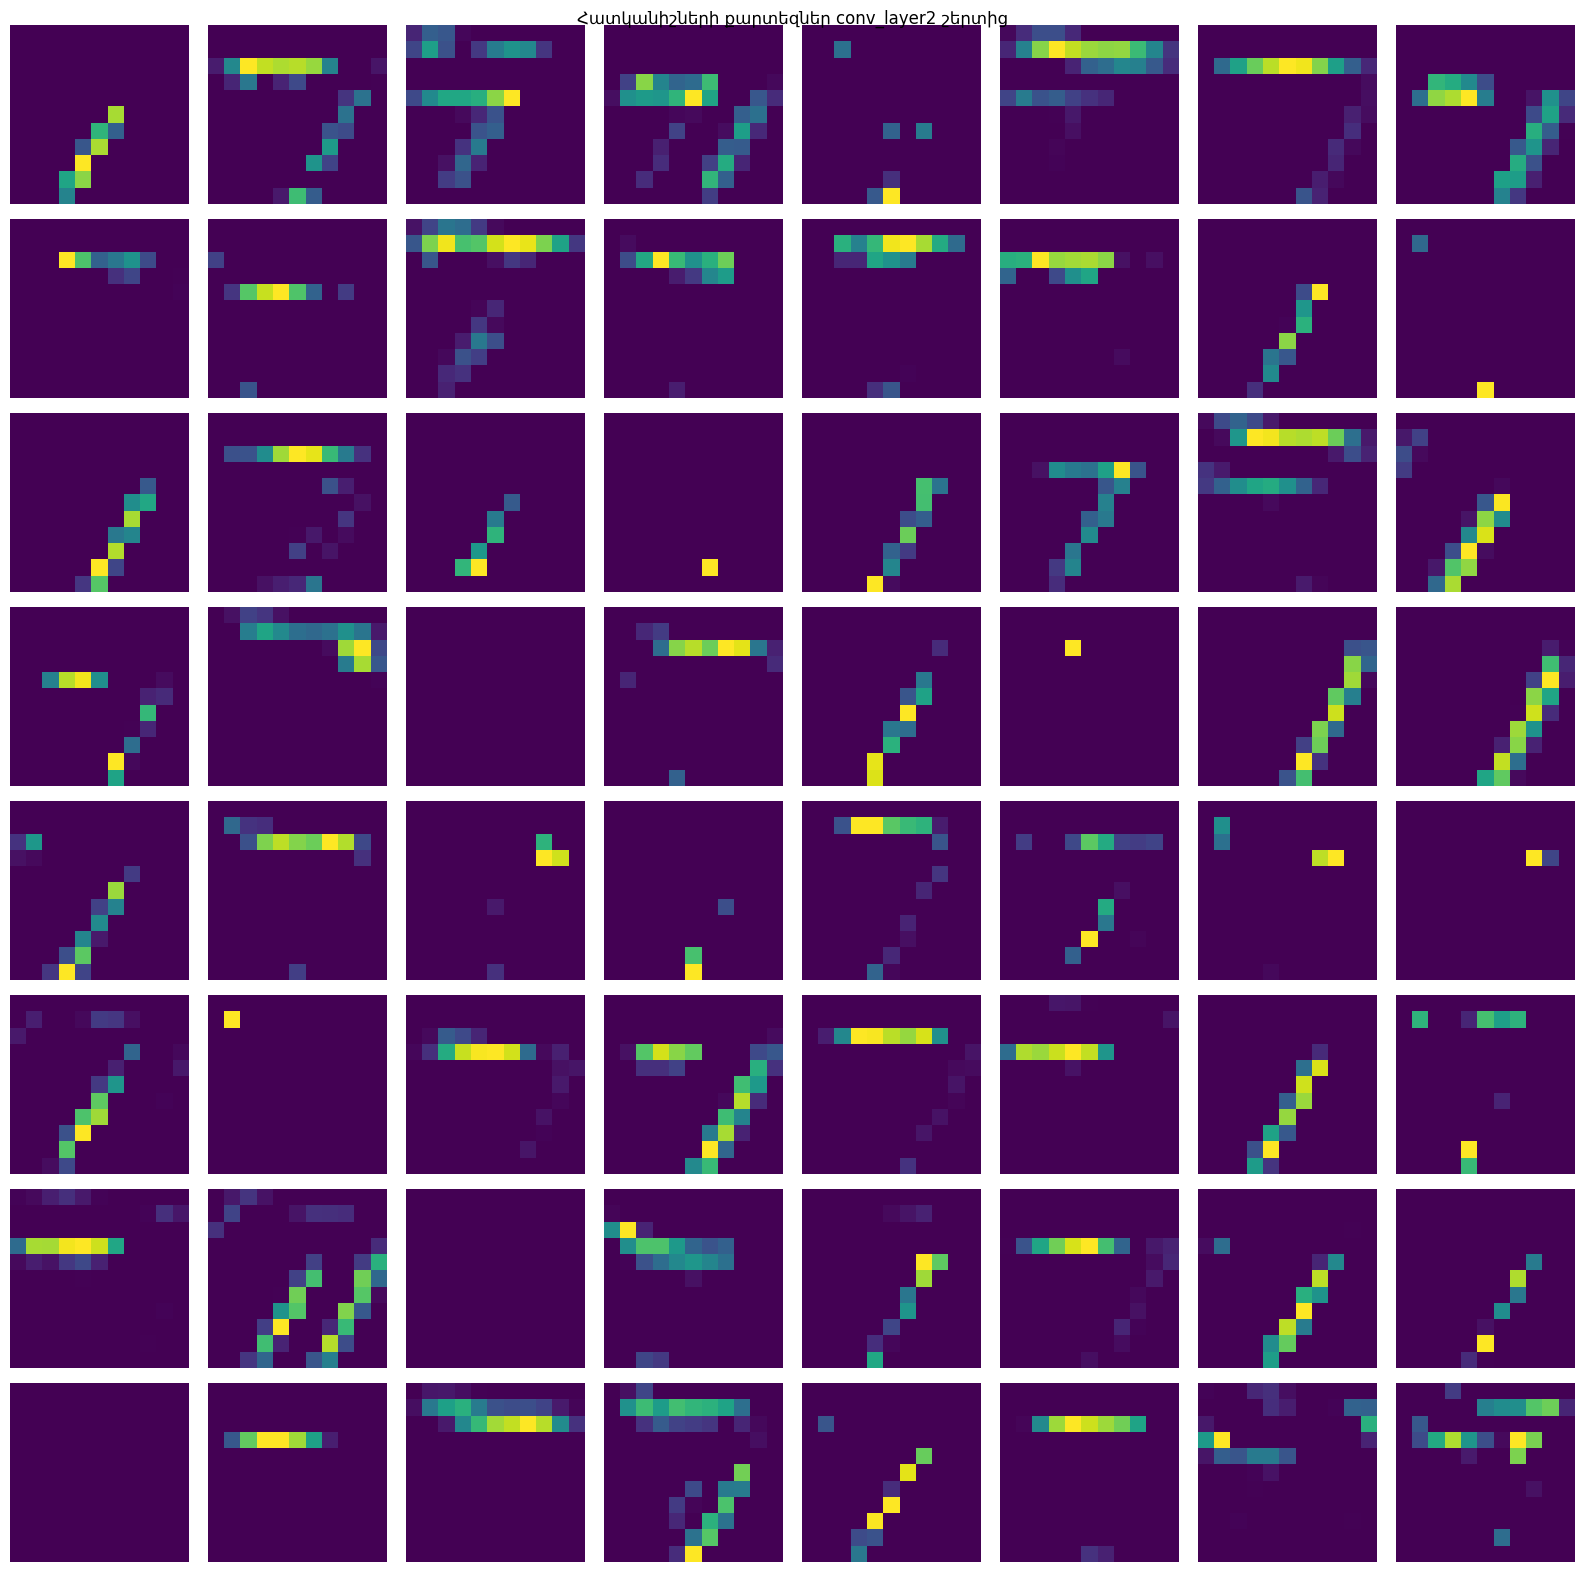

In [ ]:
# Քայլ 11: Հատկանիշների քարտեզների վիզուալիզացիա
print("\nՔայլ 11: Հատկանիշների քարտեզների վիզուալիզացիա...")

def visualize_feature_maps_alternative(model, test_image):
    for layer_name in ['conv_layer1', 'conv_layer2']:
        try:

            temp_model = models.Sequential()
            temp_model.add(layers.Input(shape=(28, 28, 1)))


            if layer_name == 'conv_layer1':
                weights = model.get_layer(layer_name).get_weights()
                temp_model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
                temp_model.layers[-1].set_weights(weights)
            elif layer_name == 'conv_layer2':

                weights1 = model.get_layer('conv_layer1').get_weights()
                temp_model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
                temp_model.layers[-1].set_weights(weights1)

                temp_model.add(layers.MaxPooling2D((2, 2)))

                weights2 = model.get_layer(layer_name).get_weights()
                temp_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
                temp_model.layers[-1].set_weights(weights2)


            feature_maps = temp_model.predict(test_image.reshape(1, 28, 28, 1))


            print(f"\nՎիզուալիզացնում ենք {layer_name} շերտի հատկանիշների քարտեզները")
            print(f"Հատկանիշների քարտեզի ձևը: {feature_maps.shape}")

            n_features = feature_maps.shape[-1]
            n_cols = min(8, n_features)
            n_rows = (n_features + n_cols - 1) // n_cols

            plt.figure(figsize=(n_cols * 2, n_rows * 2))
            for i in range(n_features):
                plt.subplot(n_rows, n_cols, i+1)
                plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
                plt.axis('off')
            plt.suptitle(f"Հատկանիշների քարտեզներ {layer_name} շերտից")
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Չհաջողվեց վիզուալիզացնել {layer_name} շերտի հատկանիշների քարտեզները: {e}")

sample_image = test_images[0]
try:
    visualize_feature_maps_alternative(model, sample_image)
except Exception as e:
    print(f"Չհաջողվեց վիզուալիզացնել հատկանիշների քարտեզները: {e}")

# Sentiment Analysis

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:


# ============== Մաս 1: Տվյալների նախապատրաստում ==============

# Դրական կարծիքների հավաքածու
positive_reviews = [
    "This movie was fantastic! I really enjoyed every moment of it. The acting was superb.",
    "One of the best films I've seen in years. The director did an amazing job.",
    "Great performances by all actors, especially the lead. Highly recommended!",
    "A masterpiece of modern cinema. The screenplay was brilliant and thought-provoking.",
    "This film deserves all the awards it received. Absolutely stunning visuals and storyline.",
    "I was blown away by the cinematography and the musical score. A must-see for everyone.",
    "The plot twists kept me on the edge of my seat. I couldn't look away for a second.",
    "This movie made me laugh and cry. Such an emotional rollercoaster, but in a good way.",
    "The character development was incredible. I felt connected to each of them.",
    "Beautiful storytelling combined with amazing special effects. One of my favorites now.",
    "This film will be remembered as a classic for generations to come.",
    "I've watched it three times already and discover something new each time.",
    "The dialogue was so clever and witty. I found myself quoting lines afterward.",
    "A perfect balance of action, drama, and humor. Thoroughly entertaining.",
    "The director's attention to detail really shows in every scene. Magnificent work.",
    "I can't recommend this film enough, it's a cinematic triumph.",
    "The performances were outstanding, especially from the supporting cast.",
    "A genuinely moving story that stays with you long after watching.",
    "Not a single dull moment in the entire film, kept me engaged throughout.",
    "What an incredible journey - both visually and emotionally stimulating."
]

# Բացասական կարծիքների հավաքածու
negative_reviews = [
    "This was the worst movie I've seen in years. Complete waste of time and money.",
    "The plot made absolutely no sense. I was confused throughout the entire film.",
    "Terrible acting by the entire cast. It felt like watching an amateur drama club.",
    "The special effects were laughably bad. You could see the green screen in many scenes.",
    "I almost fell asleep multiple times. Boring and predictable storyline.",
    "The dialogue was so poorly written, it made me cringe repeatedly.",
    "This movie had potential but failed to deliver on every level.",
    "I can't believe I sat through the whole thing. Nothing could save this disaster.",
    "The characters were one-dimensional and forgettable.",
    "The ending was ridiculous and ruined whatever little good there was in the film.",
    "Overacted, overproduced, and overrated. Don't believe the hype.",
    "This is what happens when studios care more about profit than quality.",
    "The pacing was terrible. It felt much longer than its actual runtime.",
    "I want those two hours of my life back. Absolutely disappointing.",
    "A complete mess from start to finish. I don't recommend it to anyone.",
    "The script was so bad it's hard to believe professionals wrote it.",
    "Not a single redeeming quality in this entire production.",
    "Painfully bad acting combined with a nonsensical plot.",
    "I've seen student films with better production value than this.",
    "How this got approved for release is beyond me. Truly awful."
]

#պիտի այնպիսի ցանց գրենք, որ հետո նոր review տանք, ինքը պատասխանի՝ դրական է, բացասական է թե նեյտրալ

# Պատրաստել տվյալները DataFrame-ի ձևաչափով
reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# Ստեղծել DataFrame
data = pd.DataFrame({
    'review': reviews,
    'sentiment': labels
})

# Տվյալները խառնել
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Տվյալների չափը: {data.shape}")
print("\nԴրական և բացասական կարծիքների բաշխումը:")
print(data['sentiment'].value_counts())

Տվյալների չափը: (40, 2)

Դրական և բացասական կարծիքների բաշխումը:
sentiment
1    20
0    20
Name: count, dtype: int64


In [ ]:
# ============== Մաս 2: Տեքստային տվյալների նախապատրաստում ==============


max_words = 1000
max_len = 100

# Ստեղծել tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['review'])

# Վերափոխել տեքստերը թվային հաջորդականությունների
sequences = tokenizer.texts_to_sequences(data['review'])

# Լրացնել հաջորդականությունները միևնույն երկարությամբ
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Բաժանել տվյալները ուսուցման և ստուգման հավաքածուների
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, data['sentiment'], test_size=0.2, random_state=42
)

print(f"\nԲառարանի չափը: {len(tokenizer.word_index)}")
print(f"Ուսուցման տվյալների չափը: {X_train.shape}")
print(f"Ստուգման տվյալների չափը: {X_test.shape}")


Բառարանի չափը: 268
Ուսուցման տվյալների չափը: (32, 100)
Ստուգման տվյալների չափը: (8, 100)


In [ ]:
# ============== Մաս 3: RNN Մոդելի կառուցում ==============

# Embedding-ի չափողականությունը
embedding_dim = 16
#Embedding-ների միիջոցով է տեքստը դառնում վեկտոր ու այդ վեկտորը գալիս մոդելին

# Մոդելի կառուցում
# տեքստայինները Sequential ձևով են աշխատում, այսինքն բառ առ բառ պիտի վերցնի հերթով
model = Sequential([
    # Embedding շերտ
     # տալիս ենք Embedding շերտը, քանի որ մեզ պետք է ինփութ տված տեքստերը դառնան վեկտորներ
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    # RNN շերտ
    SimpleRNN(units=32, return_sequences=False),
    # Dropout՝ գերհարմարեցումը կանխելու համար
    Dropout(0.5), #ovedrfitting-ից խուսափելու համար ենք սա դնում
    # Ելքային շերտ
    Dense(1, activation='sigmoid')
])
#մեր պատասխանը՝ դրական, բացասական կամ նեյտրալ է, այսինքն սիգմոիդով այդ հարցը կարող ենք լուծել
#0՝ բացասական, 1՝ դրական, իսկ եթե ոչ 1 է, ոչ 0 է, ուրեմն նեյտրալ է

# Մոդելի կարգավորում
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Մոդելի ամփոփում
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ============== Մաս 4: Մոդելի ուսուցում ==============

# Ուսուցման պարամետրեր
epochs = 10
batch_size = 4

# Մոդելի ուսուցում
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.6288 - loss: 0.6533 - val_accuracy: 0.6250 - val_loss: 0.6674
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4667 - loss: 0.6827 - val_accuracy: 0.3750 - val_loss: 0.7578
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7288 - loss: 0.6395 - val_accuracy: 0.3750 - val_loss: 0.7137
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5445 - loss: 0.6647 - val_accuracy: 0.6250 - val_loss: 0.6693
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4402 - loss: 0.7113 - val_accuracy: 0.6250 - val_loss: 0.6709
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3893 - loss: 0.7486 - val_accuracy: 0.6250 - val_loss: 0.6742
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4805 - loss: 0.7725 - val_accuracy: 0.6250 - val_loss: 0.6811
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5386 - loss: 0.6464 - val_accuracy: 0.6250 - val_loss: 0.6896


In [ ]:
# ============== Մաս 5: Արդյունքների գնահատում ==============

# Գնահատել մոդելը ստուգման տվյալների վրա
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nՍտուգման ճշգրտություն: {accuracy:.4f}")

# Կանխատեսել դասերը ստուգման տվյալների համար
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Դասակարգման հաշվետվություն
print("\nԴասակարգման հաշվետվություն:")
print(classification_report(y_test, y_pred))

# Շփոթության մատրիցա
print("\nՇփոթության մատրիցա:")
print(confusion_matrix(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.3750 - loss: 0.6984

Ստուգման ճշգրտություն: 0.3750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step

Դասակարգման հաշվետվություն:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8


Շփոթության մատրիցա:
[[3 0]
 [5 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


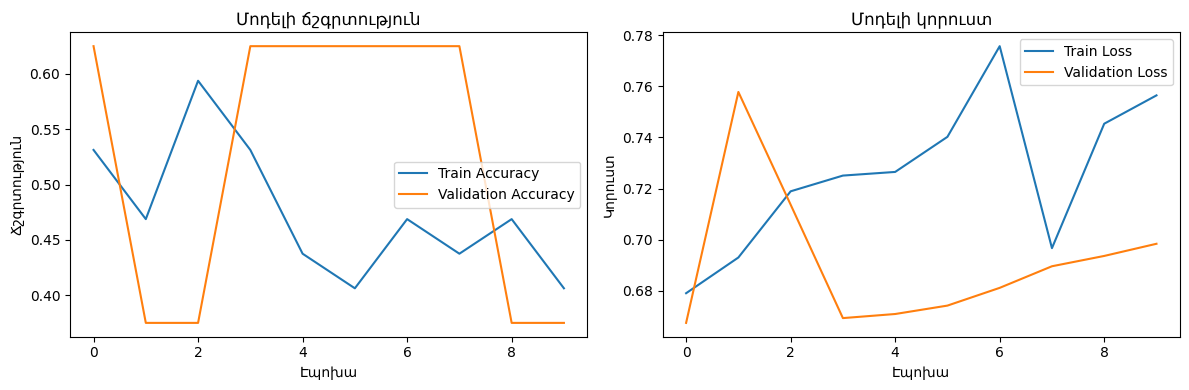

In [ ]:
# ============== Մաս 6: Ուսուցման դինամիկայի վիզուալիզացիա ==============

# Գծապատկեր ճշգրտության համար
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Մոդելի ճշգրտություն')
plt.xlabel('Էպոխա')
plt.ylabel('Ճշգրտություն')
plt.legend()

# Գծապատկեր կորստի համար
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Մոդելի կորուստ')
plt.xlabel('Էպոխա')
plt.ylabel('Կորուստ')
plt.legend()

plt.tight_layout()
plt.show()

#accuracy-ն բավականին ցածր է, քանի որ 1 հատ շերտ է ընդամենը ու տեքստը քիչ է

In [ ]:


# ============== Մաս 7: Նոր տեքստերի կանխատեսում ==============

def predict_sentiment(text):
    """Կանխատեսել զգացմունքը տրված տեքստի համար"""
    # Վերափոխել տեքստը թվերի հաջորդականության
    sequence = tokenizer.texts_to_sequences([text])
    # Լրացնել հաջորդականությունը
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    # Կանխատեսել
    prediction = model.predict(padded)[0][0]
    # Վերադարձնել արդյունքը
    sentiment = "Դրական" if prediction > 0.5 else "Բացասական"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    return sentiment, confidence

# Թեստային օրինակներ
test_samples = [
    "I really enjoyed this movie, it was fantastic!",
    "This film was terrible and I hated every minute of it.",
    "The movie was okay, not great but not terrible either."
]

# Թեստավորել մոդելը նոր օրինակների վրա
print("\nՆոր օրինակների կանխատեսումներ:")
for sample in test_samples:
    sentiment, confidence = predict_sentiment(sample)
    print(f"Տեքստ: {sample}")
    print(f"Կանխատեսում: {sentiment}, Վստահություն: {confidence:.4f}\n")


Նոր օրինակների կանխատեսումներ:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Տեքստ: I really enjoyed this movie, it was fantastic!
Կանխատեսում: Բացասական, Վստահություն: 0.5101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Տեքստ: This film was terrible and I hated every minute of it.
Կանխատեսում: Բացասական, Վստահություն: 0.5101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Տեքստ: The movie was okay, not great but not terrible either.
Կանխատեսում: Բացասական, Վստահություն: 0.5101

